In [145]:
import pandas as pd
import numpy as np
import requests


In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [211]:
body = client_c870ce93204d481d9cff40153778877f.get_object(Bucket='capstoneproject-donotdelete-pr-vqarjudcjcm1wz',Key='fly.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_fly = pd.read_excel(body)
df_fly

,Workspace,Area,101-300,301-500,501-700,701-900,901 and above
0,Raffles Place/ Tanjong Pagar,RP,12,20,4,6,0
1,Orchard/ Tanglin/ Bukit Timah,OR,1,5,1,2,3
2,Bugis/ City Hall,BG,5,5,5,5,1
3,Suntec/ Esplanade,ST,4,3,0,1,0
4,Clarke Quay/ Robertson Quay,CQ,0,5,1,1,0
5,Kallang/ Lavender,KL,0,0,1,0,0
6,Geylang/ MacPherson/ Katong,GL,6,3,2,0,2
7,Novena/ Balestier/ Toa Payoh,NV,2,2,1,0,0
8,West/ one-north,WS,1,2,2,0,0
9,North,NR,3,0,0,0,0


In [212]:
df_flyx = df_fly[['101-300','301-500','501-700','701-900','901 and above']]

In [213]:
df_flyx.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
101-300,12,1,5,4,0,0,6,2,1,3,1,2,1,1,2
301-500,20,5,5,3,5,0,3,2,2,0,0,1,0,2,2
501-700,4,1,5,0,1,1,2,1,2,0,0,3,0,0,0
701-900,6,2,5,1,1,0,0,0,0,0,0,0,0,1,0
901 and above,0,3,1,0,0,0,2,0,0,0,2,0,0,0,0


In [214]:
results=np.array(df_flyx.T)
results

array([[12,  1,  5,  4,  0,  0,  6,  2,  1,  3,  1,  2,  1,  1,  2],
       [20,  5,  5,  3,  5,  0,  3,  2,  2,  0,  0,  1,  0,  2,  2],
       [ 4,  1,  5,  0,  1,  1,  2,  1,  2,  0,  0,  3,  0,  0,  0],
       [ 6,  2,  5,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  3,  1,  0,  0,  0,  2,  0,  0,  0,  2,  0,  0,  0,  0]])

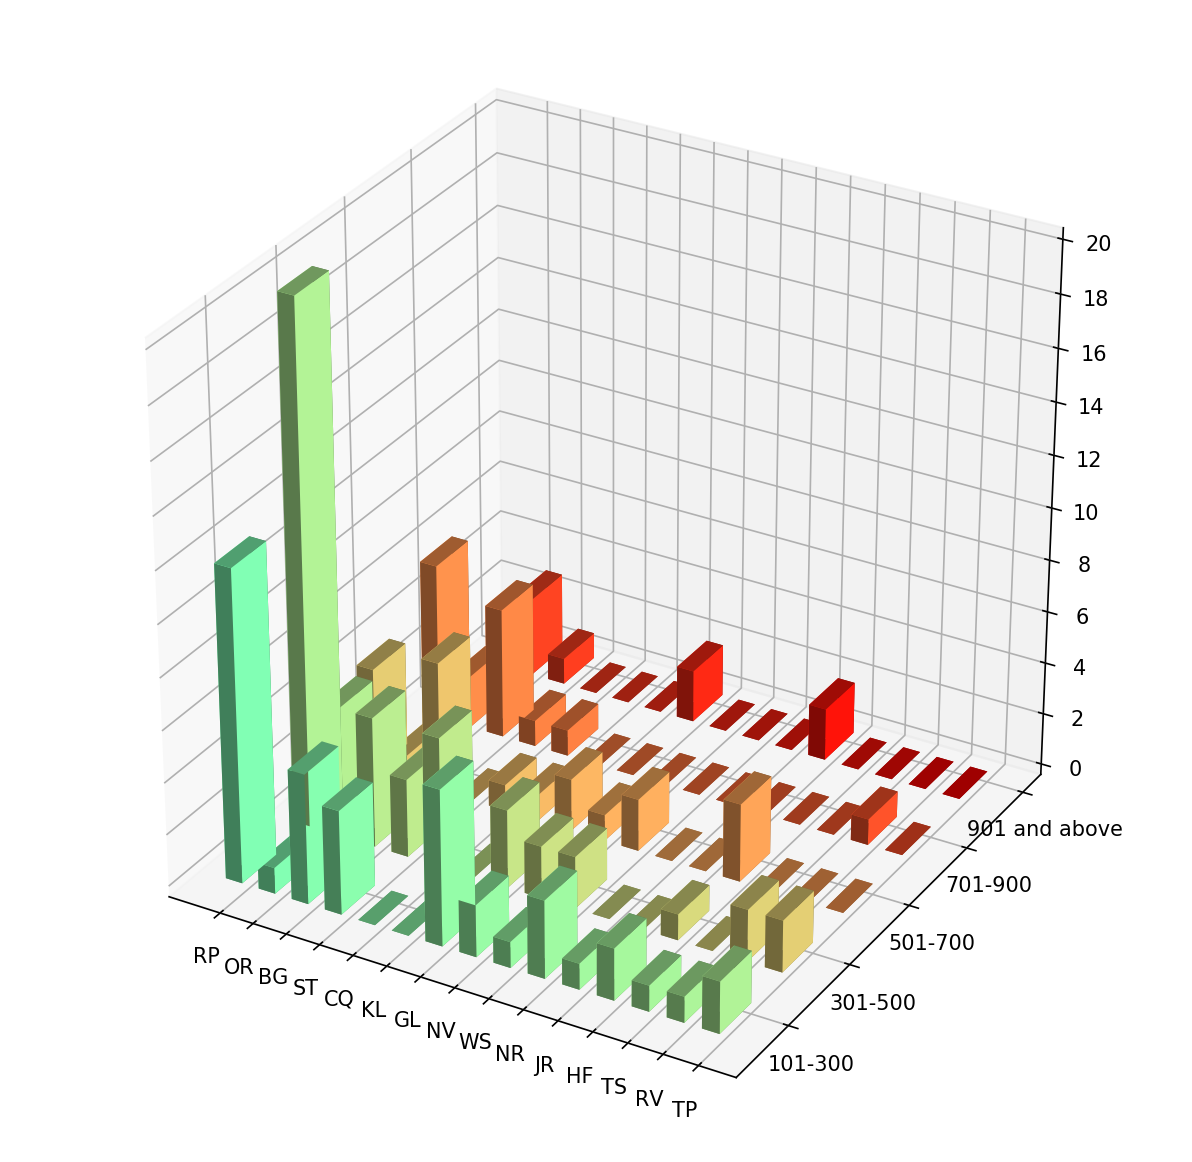

In [232]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import MaxNLocator


fig=plt.figure(figsize=(10, 10), dpi=150)
ax1=fig.add_subplot(111, projection='3d')

xlabels = np.array(['RP', 'OR', 'BG','ST', 'CQ','KL','GL','NV','WS','NR','JR','HF','TS','RV','TP'])
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['101-300','301-500','501-700','701-900','901 and above'])
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos=results
zpos = zpos.ravel()

dx=0.5
dy=0.5
dz=zpos

ax1.w_xaxis.set_ticks(xpos + dx)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + dy)
ax1.w_yaxis.set_ticklabels(ylabels)

ax1.zaxis.set_major_locator(MaxNLocator(integer=True))

values = np.linspace(0.5, 1., xposM.ravel().shape[0])
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)
plt.show()